In [12]:
import torch
import torchvision
from torchvision import datasets, transforms
# from sklearn.model_selection import train_test_split
# from sklearn.manifold import TSNE
# from mpl_toolkits.mplot3d import Axes3D
# import plotly.express as px

In [13]:
torch.manual_seed(42)
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train= datasets.MNIST(root='./data/MNIST', train=True, download=True, transform=transform)
test= datasets.MNIST(root='./data/MNIST', train=False, download=True, transform=transform)

Total No of images in the train dataset 60000
Total No of classes in the train dataset: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Total No of images in the test dataset 10000
Total No Classes in the test dataset: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Image shape: torch.Size([1, 28, 28])


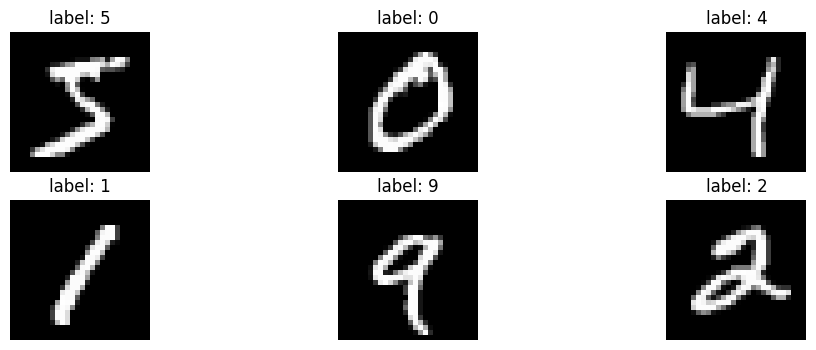

In [14]:
import matplotlib.pyplot as plt

print("Total No of images in the train dataset", len(train))
print("Total No of classes in the train dataset:", train.classes)
print("Total No of images in the test dataset", len(test))
print("Total No Classes in the test dataset:", test.classes)
image, label = train[0]
print('Image shape:', image.shape)

plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(train[i][0].squeeze(), cmap='gray') 
    plt.title(f'label: {train[i][1]}')
    plt.axis('off')
plt.show()

In [15]:
#flattening the MNIST images into vectors
X_train= train.data.numpy().reshape(-1, 28*28)
y_train= train.targets.numpy()

X_test= test.data.numpy().reshape(-1, 28*28)
y_test= test.targets.numpy()
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


In [16]:
import numpy as np
import torch.nn as nn

#activation functions
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))
def tanh(x):
    return torch.tanh(x)

# cross entropy loss fucntion
def cross_entropy_loss(y_pred, y_true):
    y_pred = torch.softmax(y_pred, dim=1) 
    return -torch.sum(y_true * torch.log(y_pred + 1e-10))/y_pred.size(0) 

class MNIST_NN(nn.Module):
    def __init__(self, activation_function= nn.ReLU()):
        super(MNIST_NN, self).__init__()
        self.fc1= nn.Linear(28*28, 30) # First hidden layer with 30 neurons
        self.fc2= nn.Linear(30, 20) # Second hidden layer with 20 neurons
        self.fc3= nn.Linear(20, 10) # Output layer with 10 neurons (for 10 classes)
        self.activation= activation_function 

    def forward(self, x):
        x= self.activation(self.fc1(x))  
        x= self.activation(self.fc2(x))  
        x= self.fc3(x)             
        return x

In [17]:
batch_size= 128
epochs= 1000         
lr= 0.001
num_classes=10
y_train_one_hot= np.zeros((y_train.size, num_classes))

for a in range(len(y_train)):
    y_train_one_hot[a][y_train[a]]= 1

X_train_tensor= torch.tensor(X_train, dtype=torch.float)
y_train_tensor= torch.tensor(y_train_one_hot, dtype=torch.long)
X_test_tensor= torch.tensor(X_test, dtype=torch.float)
y_test_tensor= torch.tensor(y_test, dtype=torch.long)

In [19]:
# initializing model and optimizer
model= MNIST_NN()  
optimizer= torch.optim.Adam(model.parameters(), lr=lr)

epoch_val= []
loss_val= []

# training loop
for epoch in range(epochs+1):
    model.train()
    optimizer.zero_grad()
    # forward pass
    output= model(X_train_tensor)
    loss= cross_entropy_loss(output, y_train_tensor)

    # backward pass
    loss.backward()
    optimizer.step()

    epoch_val.append(epoch)
    loss_val.append(loss.item())
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


Epoch 0, Loss: 14.940207
Epoch 100, Loss: 0.451789
Epoch 200, Loss: 0.250594
Epoch 300, Loss: 0.189641
Epoch 400, Loss: 0.154062
Epoch 500, Loss: 0.129203
Epoch 600, Loss: 0.111037
Epoch 700, Loss: 0.097081
Epoch 800, Loss: 0.085939
Epoch 900, Loss: 0.076311
Epoch 1000, Loss: 0.068344


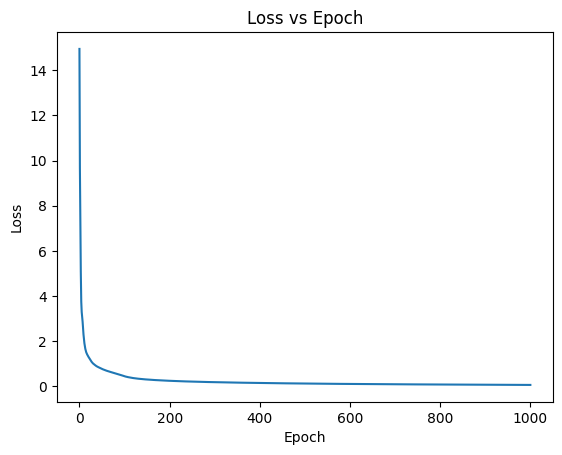

In [20]:
# Loss vs Epoch plot
loss_lst = [i for i in loss_val] 
plt.plot(epoch_val, loss_lst)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [23]:
#testing model on test dataset 
model.eval()
with torch.no_grad():
    output= model(X_test_tensor)
    predicted= output.argmax(dim=1)

predicted_class= predicted.numpy().tolist()
true_class= y_test_tensor.numpy().tolist()

print("Predicted (starting 10):", predicted_class[:10])
print("True (starting 10):", true_class[:10])

Predicted (starting 10): [7, 2, 1, 0, 4, 1, 4, 9, 4, 9]
True (starting 10): [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [24]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# f1 score and confusion matrix 
f1= f1_score(y_test_tensor.numpy(), predicted, average='weighted')
conf_matrix= confusion_matrix(y_test_tensor.numpy(), predicted)
corr= 0
for a in range(len(y_test_tensor)):
    if y_test_tensor[a] == predicted[a]:
        corr += 1

acc= (corr / len(y_test_tensor)) * 100
print("Accuracy:", acc, "%")
print("F1 score:", f1)

Accuracy: 94.91000000000001 %
F1 score: 0.9490753303877096


Digit 0 confused with: [6, 5, 8]
Digit 1 confused with: [2, 3, 5]
Digit 2 confused with: [7, 0, 3]
Digit 3 confused with: [5, 2, 8]
Digit 4 confused with: [9, 6, 2]
Digit 5 confused with: [3, 8, 6]
Digit 6 confused with: [0, 5, 4]
Digit 7 confused with: [2, 9, 8]
Digit 8 confused with: [3, 5, 6]
Digit 9 confused with: [4, 8, 7]


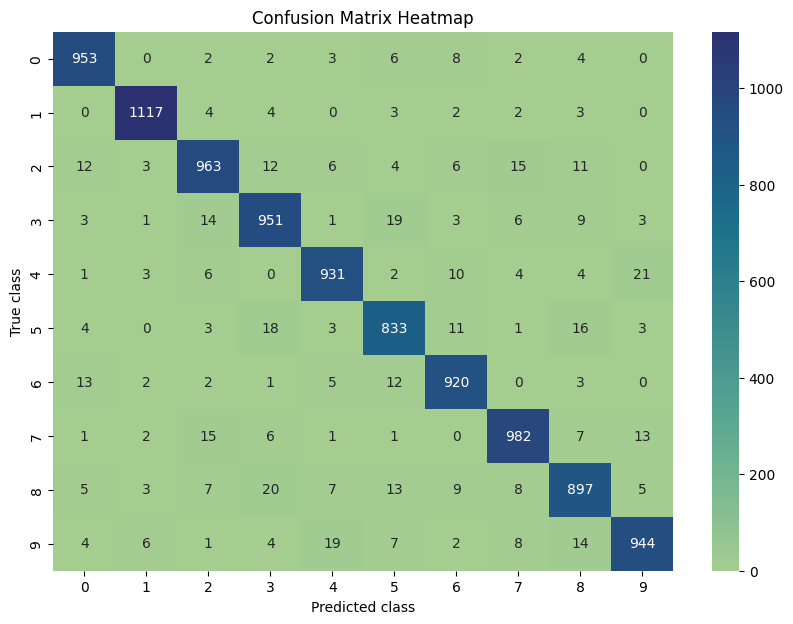

In [28]:
# Top 3 confused values
confusion= {}
for i in range(10):
    confusion[i]= conf_matrix[i]

lst = []
k= 3

for dig, cnt in confusion.items():
    confused_digits= []
    for j in range(10):
        if j != dig and cnt[j] > 0:
            confused_digits.append((j, cnt[j]))
    confused_digits.sort(key=lambda x: x[1], reverse=True)
    vals= []
    for i in range(min(k, len(confused_digits))):
        vals.append(confused_digits[i][0])   
    print(f"Digit {dig} confused with: {vals}")
    lst.append(vals)
    
    
labels= [i for i in range(10)]
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix Heatmap')
plt.show()

Training Random Forest model on MNIST Dataset

In [29]:
from sklearn.ensemble import RandomForestClassifier

# converting one hot encoded labels to single integer labels for RF
y_train_rf= np.argmax(y_train_one_hot, axis=1)  
rf_model= RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train_rf)

RandomForestClassifier(n_estimators=150, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score

pred_rf= rf_model.predict(X_test)
f1_RF= f1_score(y_test, pred_rf, average='weighted')
conf_matrix_rf= confusion_matrix(y_test, pred_rf)
acc_RF = accuracy_score(y_test, pred_rf)
print("F1 score:", f1_RF)
print(f"Accuracy: {acc_RF * 100:.2f}%")



F1 score: 0.9689834673822777
Accuracy: 96.90%


Digit 0 confused with: [8, 5, 6]
Digit 1 confused with: [3, 2, 5]
Digit 2 confused with: [7, 8, 0]
Digit 3 confused with: [2, 7, 8]
Digit 4 confused with: [9, 6, 8]
Digit 5 confused with: [3, 6, 8]
Digit 6 confused with: [0, 5, 8]
Digit 7 confused with: [2, 9, 1]
Digit 8 confused with: [9, 3, 2]
Digit 9 confused with: [3, 4, 5]


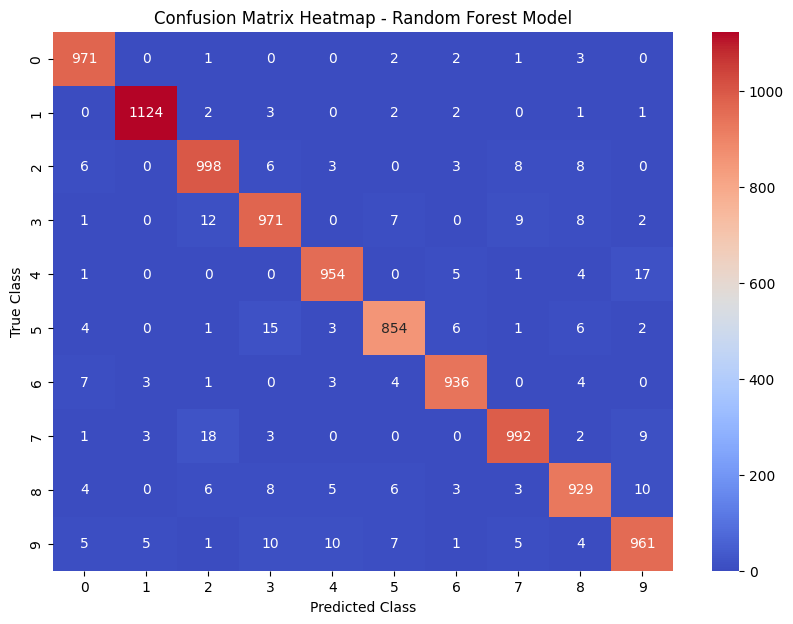

In [34]:
confusion= {}
for i in range(10):
    confusion[i]= conf_matrix_rf[i]  

lst= []
k= 3 

for dig, cnt in confusion.items():
    confused_digits= []
    for j in range(10):
        if j != dig and cnt[j] > 0:
            confused_digits.append((j, cnt[j]))
    confused_digits.sort(key=lambda x: x[1], reverse=True)

    vals= [confused_digits[i][0] for i in range(min(k, len(confused_digits)))]
    print(f"Digit {dig} confused with: {vals}")
    lst.append(vals)


labels= [i for i in range(10)]
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap - Random Forest Model')
plt.show()


Training Logistic Regression model on MNIST 

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_rf)
pred_log_reg= log_reg.predict(X_test)

/Users/zainab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
f1_log_ref= f1_score(y_test, pred_log_reg, average='weighted')
conf_matrix_log_reg= confusion_matrix(y_test, pred_log_reg)
acc_log_reg= accuracy_score(y_test, pred_log_reg)
print("F1 Score (Logistic Regression):", f1_log_ref)
print(f"Accuracy: {acc_log_reg * 100:.2f}%")


F1 Score (Logistic Regression): 0.9200970758269841
Accuracy: 92.03%


Digit 0 confused with: [6, 5, 2]
Digit 1 confused with: [8, 2, 3]
Digit 2 confused with: [8, 3, 1]
Digit 3 confused with: [5, 8, 2]
Digit 4 confused with: [9, 6, 8]
Digit 5 confused with: [8, 3, 6]
Digit 6 confused with: [5, 0, 2]
Digit 7 confused with: [9, 2, 3]
Digit 8 confused with: [5, 3, 1]
Digit 9 confused with: [7, 4, 8]


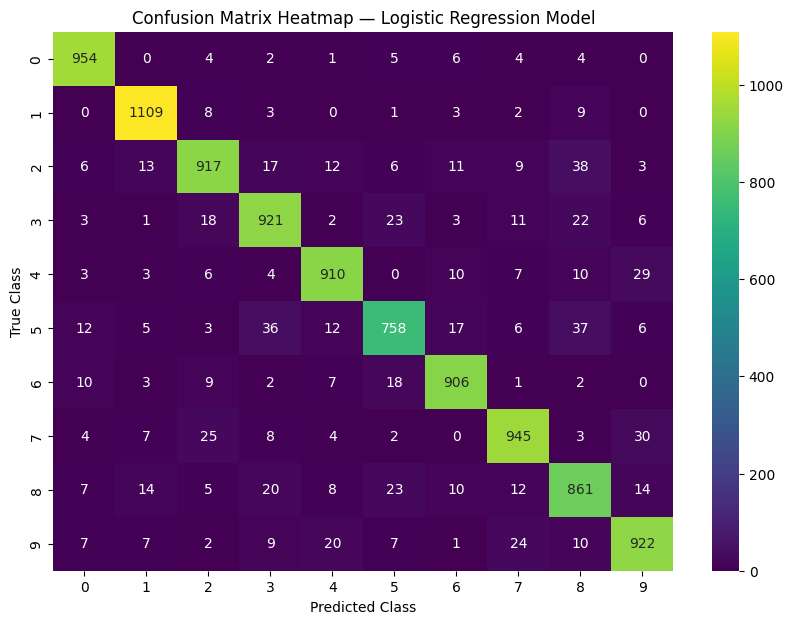

In [37]:
confusion= {}
for i in range(10):
    confusion[i]= conf_matrix_log_reg[i]

k= 3
lr_confusions= []
for dig, cnt in confusion.items():
    confused_digits = []
    for j in range(10):
        if j != dig and cnt[j] > 0:
            confused_digits.append((j, cnt[j]))

    confused_digits.sort(key=lambda x: x[1], reverse=True)
    vals = [confused_digits[i][0] for i in range(min(k, len(confused_digits)))]
    print(f"Digit {dig} confused with: {vals}")
    lr_confusions.append(vals)

labels = [i for i in range(10)]
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap — Logistic Regression Model')
plt.show()

Comparing MLP against Random Forest and Logistic Regression using accuracy, F1-score, confusion matrix

In [ ]:
# True Positives
tp_mlp= np.diag(conf_matrix)
tp_rf= np.diag(conf_matrix_rf)
tp_log_reg= np.diag(conf_matrix_log_reg)

# Accuracy 
acc_mlp = accuracy_score(y_test, predicted_class)
acc_rf = accuracy_score(y_test, pred_rf)
acc_log_reg = accuracy_score(y_test, pred_log_reg)

# fig, axes= plt.subplots(1, 2, figsize=(12, 5))

# x_axis= ['MLP', 'Random Forest', 'Logistic Regression']
# y_axis= [f1 * 100, f1_RF * 100, f1_log_ref * 100]

# axes[0].bar(x_axis, y_axis, color='yellow', edgecolor='black')
# axes[0].set_xlabel('Models')
# axes[0].set_ylabel('F1 score (%)')
# axes[0].set_title('F1 score for different models')

# y_axis_tp = [np.sum(tp_mlp), np.sum(tp_rf), np.sum(tp_log_reg)]
# axes[1].bar(x_axis, y_axis_tp, color='purple', edgecolor='black')
# axes[1].set_xlabel('Models')
# axes[1].set_ylabel('True Positive values')
# axes[1].set_title('True Positive values for different models')

# plt.tight_layout()
# plt.show()




fig, axes = plt.subplots(1, 2, figsize=(13, 5))

x_axis = np.arange(3)
models = ['MLP', 'Random Forest', 'Logistic Regression']


bar_width = 0.35
axes[0].bar(x_axis - bar_width/2, [f1*100, f1_RF*100, f1_log_ref*100], width=bar_width, color='gold', edgecolor='black', label='F1 Score (%)')
axes[0].bar(x_axis + bar_width/2, [acc_mlp*100, acc_rf*100, acc_log_reg*100], width=bar_width, color='lightgreen', edgecolor='black', label='Accuracy (%)')
axes[0].set_xticks(x_axis)
axes[0].set_xticklabels(models)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_title('F1 Score and Accuracy Comparison')
axes[0].legend()

axes[1].bar(models,[np.sum(tp_mlp), np.sum(tp_rf), np.sum(tp_log_reg)], color='orchid', edgecolor='black')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('True Positive Values')
axes[1].set_title('True Positives for Different Models')

plt.tight_layout()
plt.show()
